In [23]:
!pip install pandas matplotlib seaborn


In [32]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
# Fix: Specify separator as ';' to correctly parse columns
df = pd.read_csv("Indian Rainfall.csv", sep=';')

# Identify daily rainfall columns (e.g., '1st', '2nd', ..., '31st')
daily_rainfall_cols = [col for col in df.columns if col.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '').isdigit() and 1 <= int(col.replace('st', '').replace('nd', '').replace('rd', '').replace('th', '')) <= 31]

# Melt the DataFrame to transform daily rainfall columns into a single 'Rainfall' column
df = df.melt(id_vars=['state', 'district', 'month'],
             value_vars=daily_rainfall_cols,
             var_name='Day_Str',
             value_name='Rainfall')

# Convert 'Day_Str' to integer Day
df['Day'] = df['Day_Str'].str.extract('(\d+)').astype(int)
# Drop the intermediate 'Day_Str' column
df = df.drop(columns=['Day_Str'])

# Quick look
df.shape
df.columns
df.head()

# Info and summary
df.info()
df.describe()

# Check missing values
missing_values=df.isnull().sum()
print(missing_values)

# Handle missing values (example: fill with 0 or mean)
# This line will now work correctly as 'Rainfall' column exists
df['Rainfall'] = df['Rainfall'].fillna(0)

# Remove duplicates
df = df.drop_duplicates()
print(df)

# Convert date column to datetime
# Note: The original dataset does not contain a 'Year' column.
# For demonstration, we'll use a placeholder year (e.g., 2000) to construct a datetime object.
# Be aware that any analysis relying on the actual year will be incorrect.
df['Date'] = pd.to_datetime('2000-' + df['month'].astype(str) + '-' + df['Day'].astype(str), errors='coerce')


# Extract useful time features
# 'Year' will be 2000 due to placeholder.
df['Year'] = df['Date'].dt.year
# 'Month' can also be directly from the 'month' column, but using .dt.month is fine after Date conversion
df['Month'] = df['Date'].dt.month
# 'Day' can also be directly from the 'Day' column
df['Day'] = df['Date'].dt.day

# Season can still be calculated correctly based on the month
df['Season'] = df['Month'].map({6:'Monsoon',7:'Monsoon',8:'Monsoon',9:'Monsoon',
                                10:'Post-Monsoon',11:'Post-Monsoon',
                                12:'Winter',1:'Winter',2:'Winter',
                                3:'Summer',4:'Summer',5:'Summer'})


<>:21: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3854449426.py:21: SyntaxWarning: invalid escape sequence '\d'
  df['Day'] = df['Day_Str'].str.extract('(\d+)').astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272490 entries, 0 to 272489
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     272490 non-null  object 
 1   district  272490 non-null  object 
 2   month     272490 non-null  int64  
 3   Rainfall  272490 non-null  float64
 4   Day       272490 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 10.4+ MB
state       0
district    0
month       0
Rainfall    0
Day         0
dtype: int64
                    state                  district  month   Rainfall  Day
0       Andaman & Nicobar                  Nicobars      1   0.000000    1
1       Andaman & Nicobar  North And Middle Andaman      1   0.000000    1
2       Andaman & Nicobar            South Andamans      1   0.000000    1
3          Andhra Pradesh                 Anantapur      1   0.379965    1
4          Andhra Pradesh                  Chittoor      1  14.144900    1
...           

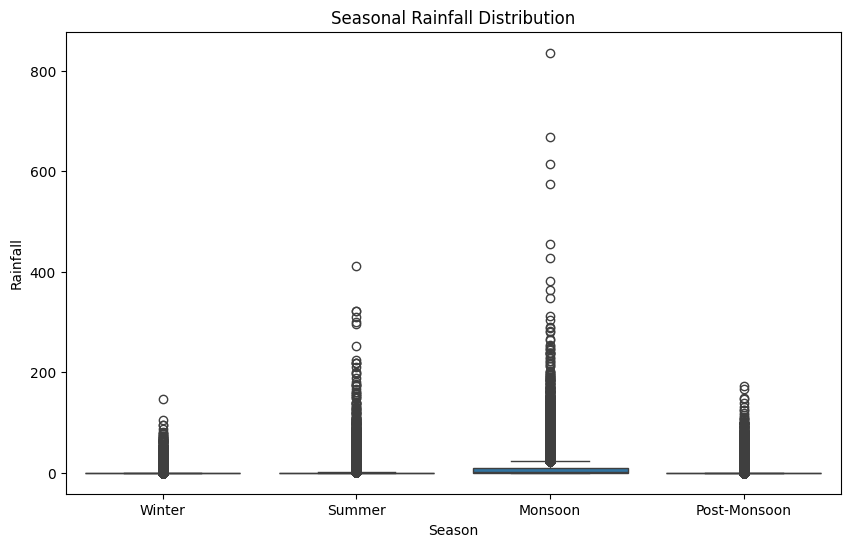

In [25]:

#Seasonal Rainfall
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Rainfall', data=df)
plt.title("Seasonal Rainfall Distribution")
plt.show()

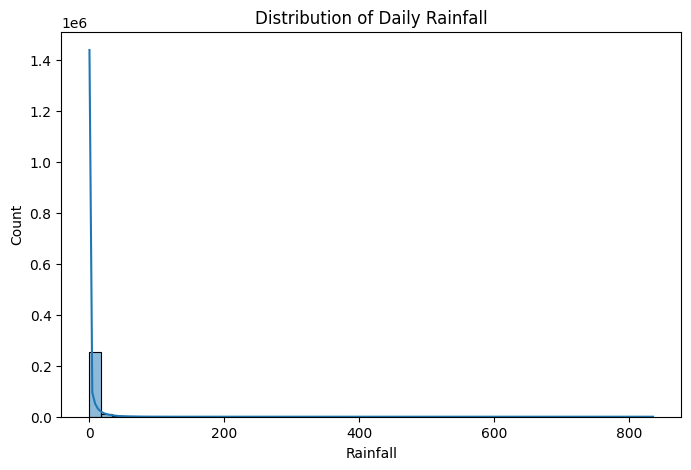

In [26]:
#Rainfall Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Rainfall'], bins=50, kde=True)
plt.title("Distribution of Daily Rainfall")
plt.show()

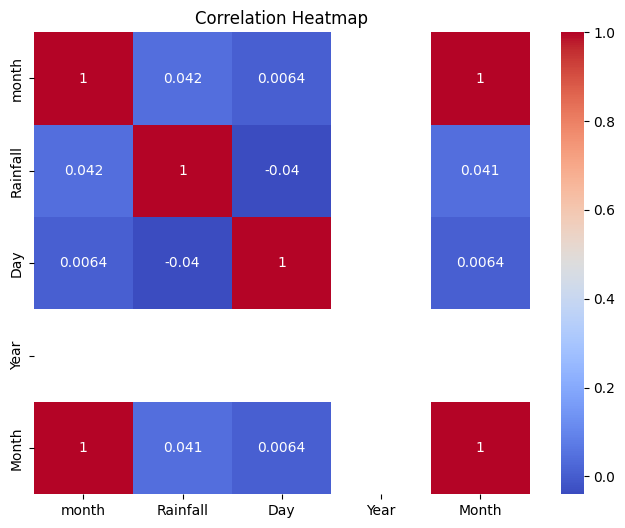

In [27]:
#Correlation & Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

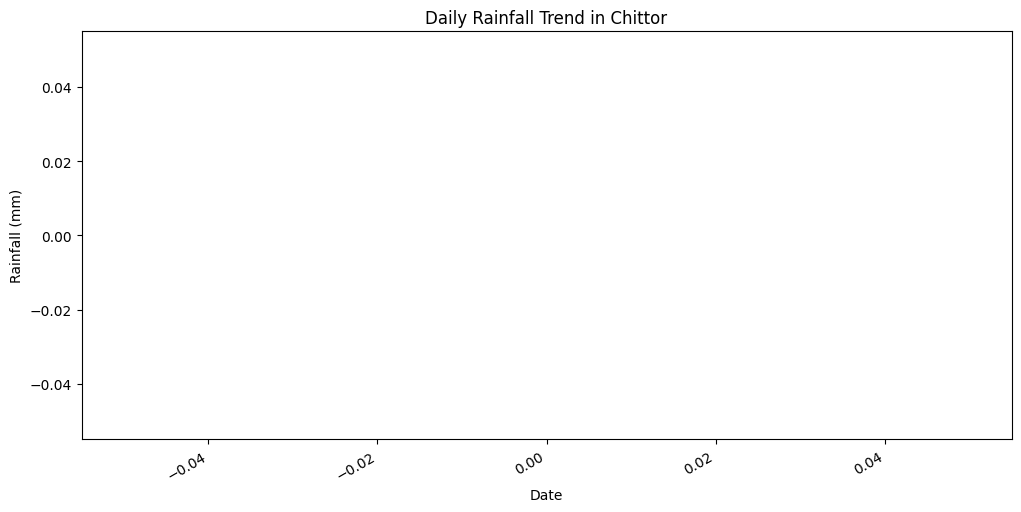

In [33]:
#Time Series Analysis
# Example: Rainfall trend for a single district
district = "Chittor"
district_data = df[df['district'] == district].groupby('Date')['Rainfall'].sum()

plt.figure(figsize=(12,6))
district_data.plot()
plt.title(f"Daily Rainfall Trend in {district}")
plt.ylabel("Rainfall (mm)")
plt.show()

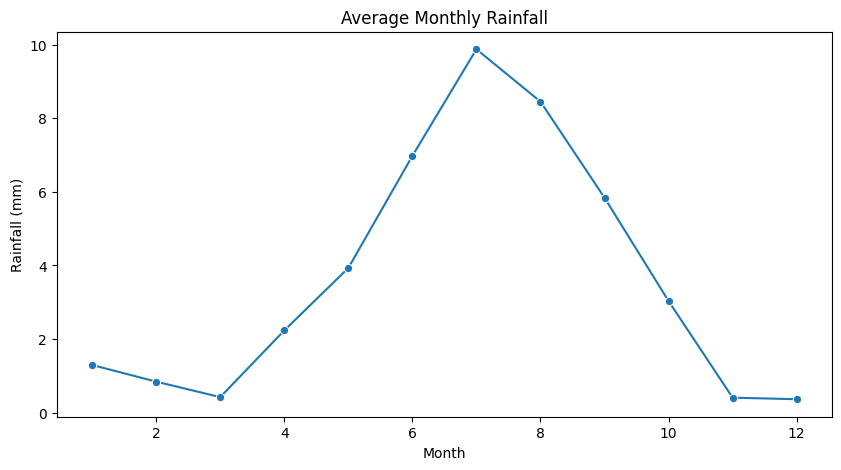

In [29]:
#Monthly Trend
monthly_avg = df.groupby('Month')['Rainfall'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title("Average Monthly Rainfall")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()


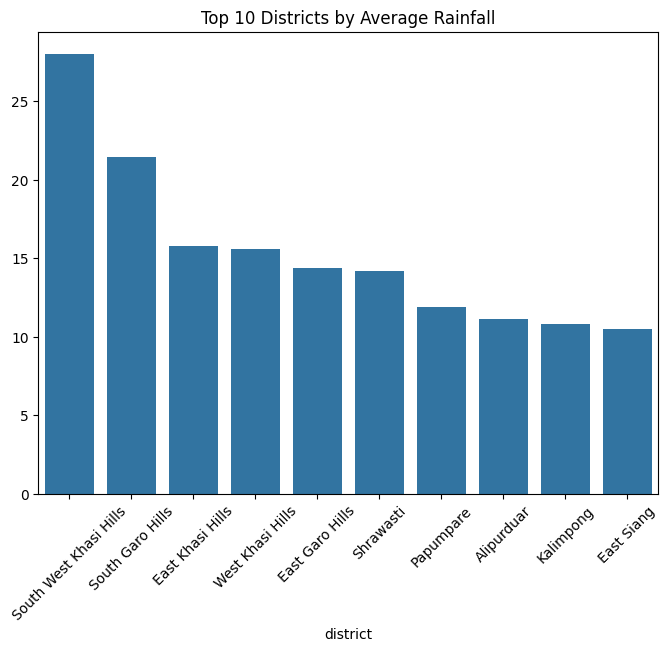

In [30]:
#District-wise Average Rainfall
district_avg = df.groupby('district')['Rainfall'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=district_avg.index, y=district_avg.values)
plt.title("Top 10 Districts by Average Rainfall")
plt.xticks(rotation=45)
plt.show()
